In [1]:
import pandas as pd

# 데이터 파일 불러오기
data = pd.read_csv('주요관광지점 입장객 2020~2022년.csv')

# '총계' 열을 기준으로 내림차순 정렬
sorted_data = data.sort_values(by='총계', ascending=False)

# 정렬된 데이터를 출력
print(sorted_data)

# 정렬된 데이터를 새로운 CSV 파일로 저장
output_file_path = 'C:\pythontest\sorted_tourist_data2_2022.csv'
sorted_data.to_csv(output_file_path, index=False, encoding='utf-8')



<>:13: SyntaxWarning: invalid escape sequence '\p'
<>:13: SyntaxWarning: invalid escape sequence '\p'
C:\Users\tb081\AppData\Local\Temp\ipykernel_9096\440655371.py:13: SyntaxWarning: invalid escape sequence '\p'
  output_file_path = 'C:\pythontest\sorted_tourist_data2_2022.csv'


         시도    군구          관광지       총계         위도          경도
0   제주특별자치도  서귀포시        천지연폭포  2507172  33.244717  126.559551
1   제주특별자치도   제주시      한라산국립공원  2155639  33.392687  126.494840
2   제주특별자치도   제주시          비자림  2094672  33.491097  126.811461
3   제주특별자치도  서귀포시  중문대포해안주상절리대  2050526  33.237994  126.426018
4   제주특별자치도  서귀포시        성산일출봉  1782849  33.462234  126.936801
5   제주특별자치도  서귀포시         정방폭포  1640313  33.244748  126.573050
6   제주특별자치도   제주시      절물자연휴양림  1596805  33.440049  126.625203
7   제주특별자치도  서귀포시     아쿠아플라넷제주  1549976  33.432977  126.927796
8   제주특별자치도  서귀포시     마라해양도립공원  1492207  33.118608  126.267295
9   제주특별자치도  서귀포시        카멜리아힐  1368326  33.290140  126.368365
10  제주특별자치도  서귀포시          산방산  1187698  33.242392  126.313951
11  제주특별자치도   제주시          만장굴  1138013  33.528377  126.771616
12  제주특별자치도  서귀포시        천제연폭포  1024594  33.252676  126.418374
13  제주특별자치도  서귀포시     서귀포자연휴양림   443662  33.338632  126.479173
14  제주특별자치도   제주시      국립제주박물관   432192  33.513500  126

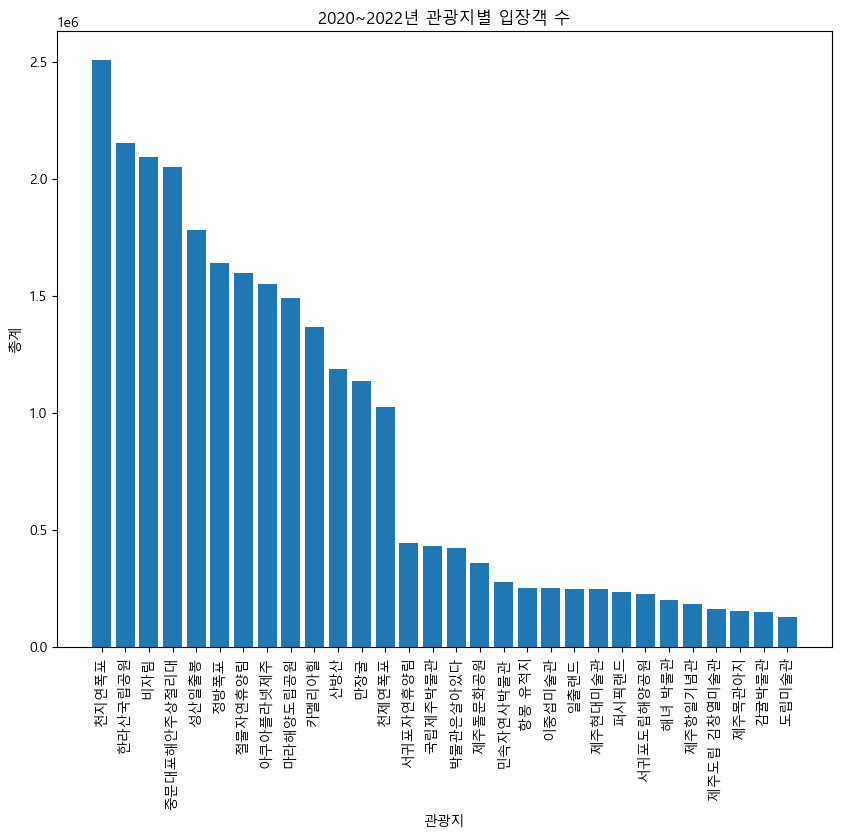

In [1]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

# '맑은 고딕' 폰트 설정
fm._get_fontconfig_fonts()
font_location = 'C:/Windows/Fonts/malgun.ttf'  # 폰트 파일 위치
font_name = fm.FontProperties(fname=font_location).get_name()
matplotlib.rc('font', family=font_name)

# 데이터 불러오기
data = pd.read_csv('주요관광지점 입장객 2020~2022년.csv')

# '총계' 열을 기준으로 내림차순 정렬
sorted_data = data.sort_values(by='총계', ascending=False)

# 막대 그래프 그리기
max_bars = 30  # 바 차트에 나타낼 최대 막대의 수
plt.figure(figsize=(10, 8))  # 그래프 크기 설정
plt.bar(sorted_data['관광지'][:max_bars], sorted_data['총계'][:max_bars])  # 막대 그래프 생성
plt.xlabel('관광지')  # x축 라벨
plt.ylabel('총계')  # y축 라벨
plt.title('2020~2022년 관광지별 입장객 수')  # 그래프 제목
plt.xticks(rotation=90)  # x축 라벨 회전
plt.show()  # 그래프 출력


In [15]:
import pandas as pd
import folium

data = pd.read_csv('주요관광지점 입장객 2020~2022년.csv')

# 위도와 경도를 가져옴
latitude = data.iloc[:, 4]
longitude = data.iloc[:, 5]
names = data.iloc[:, 0]

# 지도 생성 (초기 위치는 첫 번째 관광지의 위치로 설정)
m = folium.Map(location=[latitude[0], longitude[0]], zoom_start=10)

# 관광지 위치에 마커 추가
for lat, lon, name in zip(latitude, longitude, names):
    folium.Marker([lat, lon], popup=name).add_to(m)

# 지도 표시
m

In [13]:
import pandas as pd
import datetime

# 데이터 로드
jeju_data = pd.read_csv('제주 여행 패턴 조사.csv')


# 시간 데이터 처리를 위한 함수 정의
def convert_time(time_str):
    return datetime.datetime.strptime(time_str, '%H:%M')

def calculate_duration(start_time, end_time):
    return (end_time - start_time).seconds / 3600

def duration_to_hours(duration_str):
    hours, minutes = 0, 0
    if '시간' in duration_str:
        hours = int(duration_str.split('시간')[0])
        duration_str = duration_str.split('시간')[1]
    if '분' in duration_str:
        minutes = int(duration_str.split('분')[0])
    return hours + minutes / 60

# 각 활동에 소요되는 시간과 횟수 처리
meal_times = jeju_data['식사(카페 미포함) 소요 시간에 대해 선택해주세요.(*)'].apply(duration_to_hours)
cafe_times = jeju_data['카페에 머무르는 총 시간에 대해 선택해주세요.(*)'].apply(duration_to_hours)
stay_times = jeju_data['(방문객)한 여행지 당 머물렀던 평균시간에 대해 선택해주세요.'].apply(duration_to_hours)

start_times = jeju_data['제주 여행을 간다면 하루 일정을 몇시에 시작하고 싶은지 선택해주세요.(단, 숙소 출발 시각기준)(*)'].apply(convert_time)
end_times = jeju_data['제주 여행 하루 일정을 몇시에 마무리하고 싶은지 선택해주세요.(단, 석식 이후 숙소 도착 시간기준)(*)'].apply(convert_time)

# 총 일정 시간 계산
total_available_time = [calculate_duration(start, end) for start, end in zip(start_times, end_times)]

# 문자열에서 숫자만 추출하여 숫자 형태로 변환
jeju_data['제주 여행을 한다면 하루 식사는 몇 번 할지 선택해주세요.(*)'] = jeju_data['제주 여행을 한다면 하루 식사는 몇 번 할지 선택해주세요.(*)'].str.extract('(\d+)').astype(int)
jeju_data['여행 중 하루에 카페 방문 횟수에 대해 선택해주세요.(*)'] = jeju_data['여행 중 하루에 카페 방문 횟수에 대해 선택해주세요.(*)'].str.extract('(\d+)').astype(int)
jeju_data['하루에 방문하고 싶은 여행지 갯수에 대해 선택해주세요.(카페, 식사는 제외)(*)'] = jeju_data['하루에 방문하고 싶은 여행지 갯수에 대해 선택해주세요.(카페, 식사는 제외)(*)'].str.extract('(\d+)').astype(int)


# 평균 식사 횟수, 카페 방문 횟수, 여행지 방문 횟수 계산
average_num_meals_per_day = jeju_data['제주 여행을 한다면 하루 식사는 몇 번 할지 선택해주세요.(*)'].mean()
average_num_cafe_visits_per_day = jeju_data['여행 중 하루에 카페 방문 횟수에 대해 선택해주세요.(*)'].mean()
average_num_travel_site_visits_per_day = jeju_data['하루에 방문하고 싶은 여행지 갯수에 대해 선택해주세요.(카페, 식사는 제외)(*)'].mean()

# 하루 총 소요 시간 계산
total_time_spent_per_day_corrected = (meal_times.mean() * average_num_meals_per_day) + \
                                     (cafe_times.mean() * average_num_cafe_visits_per_day) + \
                                     (stay_times.mean() * average_num_travel_site_visits_per_day)

# 이동 가능 시간 재계산
remaining_moving_time_corrected = [total - total_time_spent_per_day_corrected for total in total_available_time]

# 모든 응답자의 평균 이동 가능 시간 재계산
average_remaining_moving_time_corrected = sum(remaining_moving_time_corrected) / len(remaining_moving_time_corrected)

average_remaining_moving_time_corrected


3.5317283950617386

In [11]:
import requests
import datetime

def fetch_and_save_data(base_url, start_date, end_date):
    current_date = start_date
    while current_date <= end_date:
        # 날짜를 YYYYMMDD 형식의 문자열로 변환
        date_str = current_date.strftime("%Y%m%d")
        
        # URL에 날짜를 추가하여 완성
        url_with_date = f"{base_url}&searchDate={date_str}"

        # 데이터 요청
        response = requests.get(url_with_date)
        
        if response.status_code == 200:
            # JSON 데이터를 문자열로 변환
            data_str = response.text

            # 파일에 저장
            with open(f"data_{date_str}.txt", "w", encoding="utf-8") as file:
                file.write(data_str)

            print(f"Data for date {date_str} saved successfully.")
        else:
            print(f"Failed to fetch data for date {date_str}. Status code: {response.status_code}")

        # 날짜를 다음 날로 이동
        current_date += datetime.timedelta(days=1)

# 스크립트 실행
base_url = "https://open.jejudatahub.net/api/proxy/51tt9Daaa6atttDataaa5Dbttattttat/ro_e1770725757jet7_be_ebb_br5c5c?movingPath=비자림&limit=100"
start_date = datetime.date(2019, 8, 1)
end_date = datetime.date(2019, 8, 31)
fetch_and_save_data(base_url, start_date, end_date)


Data for date 20190801 saved successfully.
Data for date 20190802 saved successfully.
Data for date 20190803 saved successfully.
Data for date 20190804 saved successfully.
Data for date 20190805 saved successfully.
Data for date 20190806 saved successfully.
Data for date 20190807 saved successfully.
Data for date 20190808 saved successfully.
Data for date 20190809 saved successfully.
Data for date 20190810 saved successfully.
Data for date 20190811 saved successfully.
Data for date 20190812 saved successfully.
Data for date 20190813 saved successfully.
Data for date 20190814 saved successfully.
Data for date 20190815 saved successfully.
Data for date 20190816 saved successfully.
Data for date 20190817 saved successfully.
Data for date 20190818 saved successfully.
Data for date 20190819 saved successfully.
Data for date 20190820 saved successfully.
Data for date 20190821 saved successfully.
Data for date 20190822 saved successfully.
Data for date 20190823 saved successfully.
Data for da

In [12]:
import datetime

def combine_files_by_date(start_date, end_date, output_file):
    with open(output_file, 'w', encoding='utf-8') as outfile:
        current_date = start_date
        while current_date <= end_date:
            # 날짜를 YYYYMMDD 형식의 문자열로 변환
            date_str = current_date.strftime("%Y%m%d")
            file_name = f"data_{date_str}.txt"
            
            try:
                with open(file_name, 'r', encoding='utf-8') as infile:
                    contents = infile.read()
                    outfile.write(contents + "\n")  # 파일 내용을 쓰고, 줄 바꿈 추가
                    print(f"Added data from {file_name} to {output_file}.")
            except FileNotFoundError:
                print(f"File {file_name} not found. Skipping.")

            # 날짜를 다음 날로 이동
            current_date += datetime.timedelta(days=1)

# 파일들을 하나로 합치기
start_date = datetime.date(2019, 8, 1)
end_date = datetime.date(2019, 8, 31)
combine_files_by_date(start_date, end_date, "combined_data.txt")


Added data from data_20190801.txt to combined_data.txt.
Added data from data_20190802.txt to combined_data.txt.
Added data from data_20190803.txt to combined_data.txt.
Added data from data_20190804.txt to combined_data.txt.
Added data from data_20190805.txt to combined_data.txt.
Added data from data_20190806.txt to combined_data.txt.
Added data from data_20190807.txt to combined_data.txt.
Added data from data_20190808.txt to combined_data.txt.
Added data from data_20190809.txt to combined_data.txt.
Added data from data_20190810.txt to combined_data.txt.
Added data from data_20190811.txt to combined_data.txt.
Added data from data_20190812.txt to combined_data.txt.
Added data from data_20190813.txt to combined_data.txt.
Added data from data_20190814.txt to combined_data.txt.
Added data from data_20190815.txt to combined_data.txt.
Added data from data_20190816.txt to combined_data.txt.
Added data from data_20190817.txt to combined_data.txt.
Added data from data_20190818.txt to combined_da

In [13]:
def check_data_structure(input_txt):
    with open(input_txt, 'r', encoding='utf-8') as file:
        for line in file:
            try:
                # 각 줄을 JSON으로 파싱
                json_data = json.loads(line)

                # 'data' 키의 값을 출력
                if 'data' in json_data:
                    print(f"Data structure: {type(json_data['data'])}")
                    print(f"Data content: {json_data['data']}")
                    break  # 첫 번째 데이터 확인 후 중단
            except json.JSONDecodeError:
                continue  # JSON 파싱 오류가 있는 경우, 해당 줄을 건너뜁니다.

# 실행하여 데이터 구조 확인
check_data_structure("combined_data.txt")


Data structure: <class 'list'>
Data content: [{'baseDate': '20190801', 'movingPath': '광치기해변|신양 섭지코지 해변|올인하우스|신양 섭지코지 해변|제주은행(북)|아랑조을거리 공영주차장|제주은행(북)|서귀포매일올레시장|아랑조을거리 공영주차장|칠십리공원_A|외돌개|칠십리공원_A|천지동자원순환센터|서귀포시 구 버스터미널|비석거리|삼성여자고등학교(북)|천지동자원순환센터|성산읍1|성산읍4|종달리해변|21코스|비자림', 'pathSize': 22, 'movingCount': 1}, {'baseDate': '20190801', 'movingPath': '비자림|성산읍 공영주차장|비자림|성산읍 공영주차장', 'pathSize': 4, 'movingCount': 1}, {'baseDate': '20190801', 'movingPath': '비자림|교래자연휴양림|해녀박물관|제주해녀박물관|교래자연휴양림|제주해녀박물관|해녀박물관|애월체육관|교래자연휴양림|해녀박물관|애월체육관|제주해녀박물관|교래자연휴양림|해녀박물관|제주해녀박물관|해녀박물관|교래자연휴양림|해녀박물관|제주해녀박물관|만장굴|국수문화거리|문예회관(전기차)|외도초등학교', 'pathSize': 23, 'movingCount': 1}, {'baseDate': '20190801', 'movingPath': '비자림|표선 해비치 해변|비석거리|산남새마을금고', 'pathSize': 4, 'movingCount': 1}, {'baseDate': '20190801', 'movingPath': '비자림|만장굴|국립제주박물관', 'pathSize': 3, 'movingCount': 1}, {'baseDate': '20190801', 'movingPath': '연동주민센터|노형오거리|노형근린공원|큰동네(버스)|비자림|큰동네(버스)', 'pathSize': 6, 'movingCount': 1}, {'baseDate': '20190801', 'movingPath': '제주국제

In [14]:
import json
import pandas as pd

def txt_to_csv(input_txt, output_csv):
    # 데이터를 저장할 리스트
    data_list = []

    # 텍스트 파일 열기 및 읽기
    with open(input_txt, 'r', encoding='utf-8') as file:
        for line in file:
            try:
                # 각 줄을 JSON으로 파싱
                json_data = json.loads(line)

                # 'data' 키의 값이 리스트인 경우, 리스트의 각 항목을 data_list에 추가
                if 'data' in json_data and isinstance(json_data['data'], list):
                    data_list.extend(json_data['data'])
            except json.JSONDecodeError:
                continue  # JSON 파싱 오류가 있는 경우, 해당 줄을 건너뜁니다.

    # 데이터프레임 생성 및 CSV 파일로 저장
    df = pd.DataFrame(data_list)
    df.to_csv(output_csv, index=False)

# 실행
txt_to_csv("combined_data.txt", "output_data.csv")


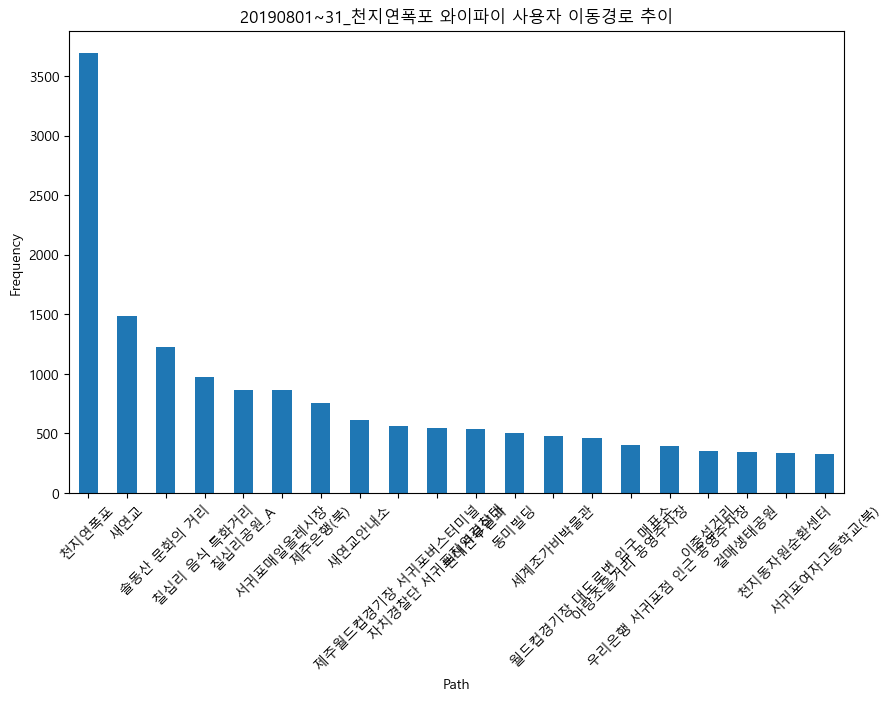

In [18]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

# CSV 파일 로드
file_path = '20190801~31_천지연폭포.csv'
df = pd.read_csv(file_path)

# 'movingPath' 컬럼의 데이터를 '|'를 기준으로 분할하여 리스트로 변환
path_lists = df['movingPath'].str.split('|').tolist()

# 모든 경로를 하나의 리스트로 통합
all_paths = [path for sublist in path_lists for path in sublist]

# 경로별 빈도수 계산
path_counts = pd.Series(all_paths).value_counts()

# '맑은 고딕' 폰트 설정
font_location = 'C:/Windows/Fonts/malgun.ttf'  # 폰트 파일 위치
font_name = fm.FontProperties(fname=font_location).get_name()
matplotlib.rc('font', family=font_name)

# 시각화
plt.figure(figsize=(10, 6))
path_counts.head(20).plot(kind='bar')
plt.title('20190801~31_천지연폭포 와이파이 사용자 이동경로 추이')
plt.xlabel('Path')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()


In [21]:
import pandas as pd

# CSV 파일 로드
file_path = '20190801~31_천지연폭포.csv'
df = pd.read_csv(file_path)

# 'movingPath' 컬럼의 데이터를 '|'를 기준으로 분할하여 리스트로 변환
path_lists = df['movingPath'].str.split('|').tolist()

# 모든 경로를 하나의 리스트로 통합
all_paths = [path for sublist in path_lists for path in sublist]

# 경로별 빈도수 계산
path_counts = pd.Series(all_paths).value_counts()

# 상위 10개 경로 및 빈도수 출력
top_10_paths = path_counts.head(10)
print("Top 10 Most Frequent Paths and Their Counts:")
print(top_10_paths)


Top 10 Most Frequent Paths and Their Counts:
천지연폭포                3694
새연교                  1484
솔동산 문화의 거리           1229
칠십리 음식 특화거리           977
칠십리공원_A               867
서귀포매일올레시장             866
제주은행(북)               759
새연교안내소                615
제주월드컵경기장 서귀포버스터미널     560
자치경찰단 서귀포지역경찰대        542
Name: count, dtype: int64


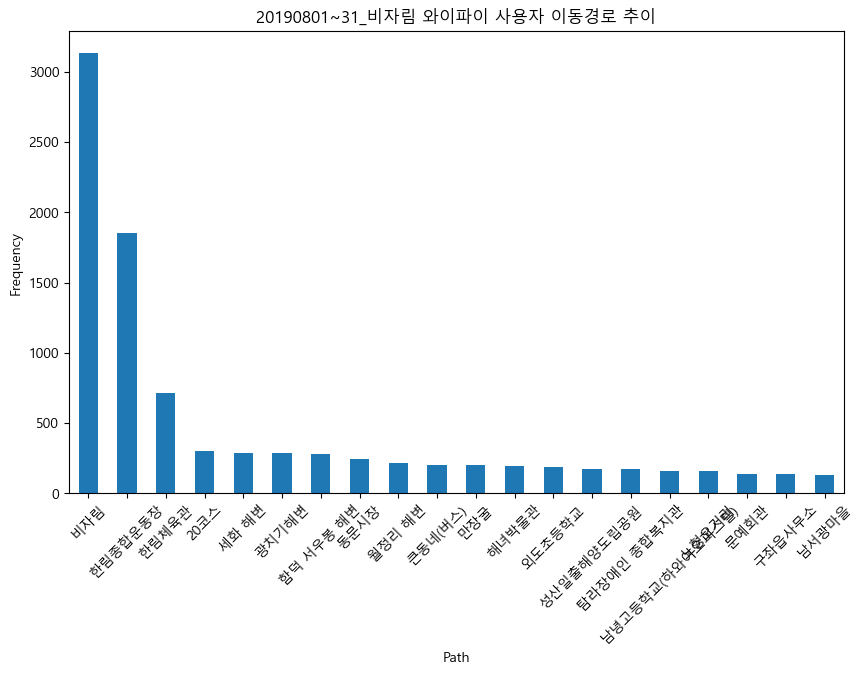

In [22]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

# CSV 파일 로드
file_path = '20190801~31_비자림.csv'
df = pd.read_csv(file_path)

# 'movingPath' 컬럼의 데이터를 '|'를 기준으로 분할하여 리스트로 변환
path_lists = df['movingPath'].str.split('|').tolist()

# 모든 경로를 하나의 리스트로 통합
all_paths = [path for sublist in path_lists for path in sublist]

# 경로별 빈도수 계산
path_counts = pd.Series(all_paths).value_counts()

# '맑은 고딕' 폰트 설정
font_location = 'C:/Windows/Fonts/malgun.ttf'  # 폰트 파일 위치
font_name = fm.FontProperties(fname=font_location).get_name()
matplotlib.rc('font', family=font_name)

# 시각화
plt.figure(figsize=(10, 6))
path_counts.head(20).plot(kind='bar')
plt.title('20190801~31_비자림 와이파이 사용자 이동경로 추이')
plt.xlabel('Path')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()


In [23]:
import pandas as pd

# CSV 파일 로드
file_path = '20190801~31_비자림.csv'
df = pd.read_csv(file_path)

# 'movingPath' 컬럼의 데이터를 '|'를 기준으로 분할하여 리스트로 변환
path_lists = df['movingPath'].str.split('|').tolist()

# 모든 경로를 하나의 리스트로 통합
all_paths = [path for sublist in path_lists for path in sublist]

# 경로별 빈도수 계산
path_counts = pd.Series(all_paths).value_counts()

# 상위 10개 경로 및 빈도수 출력
top_10_paths = path_counts.head(10)
print("Top 10 Most Frequent Paths and Their Counts:")
print(top_10_paths)


Top 10 Most Frequent Paths and Their Counts:
비자림          3132
한림종합운동장      1855
한림체육관         717
20코스          304
세화 해변         288
광치기해변         287
함덕 서우봉 해변     283
동문시장          243
월정리 해변        219
큰동네(버스)       200
Name: count, dtype: int64


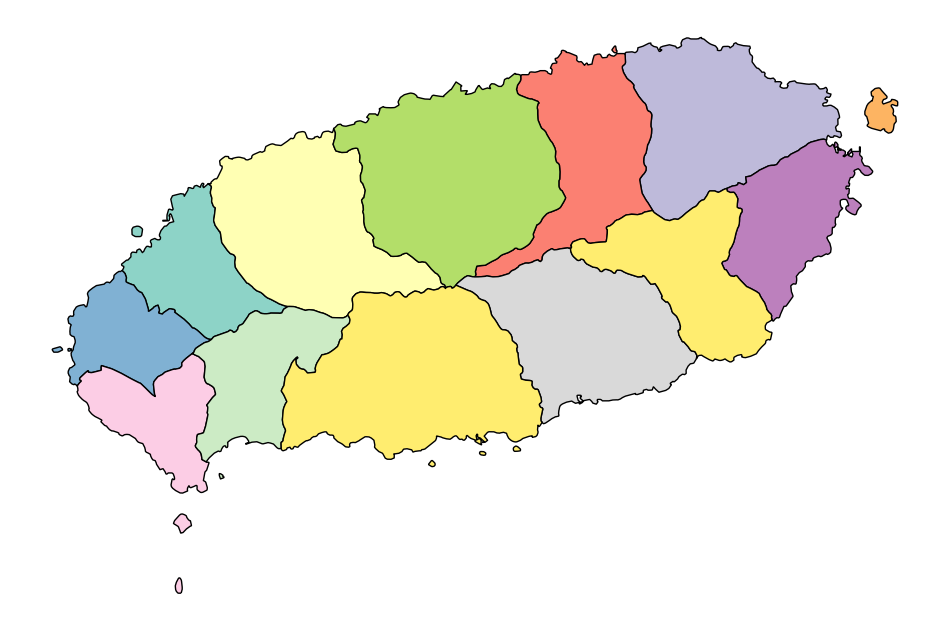

In [26]:
import geopandas as gpd
import matplotlib.pyplot as plt

# 파일 경로
file_path = '제주도읍면동경계_final.gpkg'  # 여기에 실제 파일 경로를 입력하세요.

# GeoPackage 파일 불러오기
jeju_boundary = gpd.read_file(file_path)

# 지도 시각화
fig, ax = plt.subplots(1, 1, figsize=(12, 12))
jeju_boundary.plot(ax=ax, edgecolor='black', cmap='Set3')

# 타이틀 및 축 표시 제거
ax.set_axis_off()

plt.show()


In [8]:
import pandas as pd
import folium

# CSV 파일 읽기
data = pd.read_csv('주요관광지점 입장객 2020~2022년.csv')

# 데이터를 '총계' 기준으로 내림차순 정렬
sorted_data = data.sort_values(by='총계', ascending=False)

# 상위 13개, 다음 8개, 나머지로 데이터 나누기
top_data = sorted_data.head(13)
next_data = sorted_data.iloc[13:21]
rest_data = sorted_data.iloc[21:]

# 위도, 경도, 관광지명 추출
top_latitude = top_data['위도']
top_longitude = top_data['경도']
top_names = top_data['관광지']

next_latitude = next_data['위도']
next_longitude = next_data['경도']
next_names = next_data['관광지']

rest_latitude = rest_data['위도']
rest_longitude = rest_data['경도']
rest_names = rest_data['관광지']

# 지도 생성 (초기 위치는 첫 번째 관광지의 위치로 설정)
m = folium.Map(location=[top_latitude.iloc[0], top_longitude.iloc[0]], zoom_start=10)

# 상위 13개 관광지 위치에 마커 추가 (빨간색)
for lat, lon, name in zip(top_latitude, top_longitude, top_names):
    folium.Marker([lat, lon], popup=name, icon=folium.Icon(color='red')).add_to(m)

# 다음 8개 관광지 위치에 마커 추가 (파란색)
for lat, lon, name in zip(next_latitude, next_longitude, next_names):
    folium.Marker([lat, lon], popup=name, icon=folium.Icon(color='blue')).add_to(m)

# 나머지 관광지 위치에 마커 추가 (초록색)
for lat, lon, name in zip(rest_latitude, rest_longitude, rest_names):
    folium.Marker([lat, lon], popup=name, icon=folium.Icon(color='green')).add_to(m)

# 지도 표시
m

In [27]:
import geopandas as gpd
import folium

# 파일 경로 재설정
file_path = '제주도읍면동경계_final.gpkg'

# 경계 데이터를 다시 로드합니다.
jeju_boundary = gpd.read_file(file_path)

# 경계 데이터의 좌표계를 GRS80 UTM-K (EPSG:5179)에서 WGS 84 (EPSG:4326)로 확실히 변환합니다.
jeju_boundary_transformed = jeju_boundary.to_crs(epsg=4326)

# 변환된 데이터로 제주도의 중심점을 다시 계산합니다.
jeju_center_transformed = jeju_boundary_transformed.geometry.unary_union.centroid

# Folium 지도 객체를 생성합니다. 이번에는 변환된 데이터의 중심 좌표를 사용합니다.
m_transformed = folium.Map(location=[jeju_center_transformed.y, jeju_center_transformed.x], zoom_start=10)

# 변환된 경계선만 지도에 추가합니다. fill 속성을 False로 설정하여 내부를 채우지 않습니다.
folium.GeoJson(
    jeju_boundary_transformed.to_json(),
    style_function=lambda x: {'color': 'black', 'weight': 2, 'fill': False},
    name='Jeju Boundaries'
).add_to(m_transformed)

m_transformed



In [17]:
import pandas as pd
import geopandas as gpd
import folium

# 관광지 데이터 로드 및 정렬
data = pd.read_csv('주요관광지점 입장객 2020~2022년.csv')
sorted_data = data.sort_values(by='총계', ascending=False)

# 데이터 분할
top_data = sorted_data.head(13)
next_data = sorted_data.iloc[13:21]
rest_data = sorted_data.iloc[21:]

# 제주도 읍면동 경계 데이터 로드
file_path = '제주도읍면동경계_final.gpkg'
jeju_boundary = gpd.read_file(file_path)
jeju_boundary_transformed = jeju_boundary.to_crs(epsg=4326)

# 제주도의 중심점 계산
jeju_center_transformed = jeju_boundary_transformed.geometry.unary_union.centroid

# Folium 지도 객체 생성
m_transformed = folium.Map(location=[jeju_center_transformed.y, jeju_center_transformed.x], zoom_start=10)

# 관광지 위치에 마커 추가
# for lat, lon, name in zip(top_data['위도'], top_data['경도'], top_data['관광지']):
#     folium.Marker([lat, lon], popup=name, icon=folium.Icon(color='red')).add_to(m_transformed)
# for lat, lon, name in zip(next_data['위도'], next_data['경도'], next_data['관광지']):
#     folium.Marker([lat, lon], popup=name, icon=folium.Icon(color='blue')).add_to(m_transformed)
# for lat, lon, name in zip(rest_data['위도'], rest_data['경도'], rest_data['관광지']):
#     folium.Marker([lat, lon], popup=name, icon=folium.Icon(color='green')).add_to(m_transformed)

# 제주도 경계 데이터 지도에 추가
folium.GeoJson(
    jeju_boundary_transformed.to_json(),
    style_function=lambda x: {'color': 'black', 'weight': 1, 'fill': False},
    name='Jeju Boundaries'
).add_to(m_transformed)

# 'Accom.csv' 파일 로드 및 마커 추가
accom_data = pd.read_csv('Accom.csv')
for lat, lon, name in zip(accom_data['latitude'], accom_data['longitude'], accom_data['title']):
    if pd.notna(lat) and pd.notna(lon):
        folium.Marker(
            [lat, lon],
            popup=name,
            icon=folium.Icon(color='purple', icon='info-sign')
        ).add_to(m_transformed)

# 'FnB.csv' 파일 로드 및 마커 추가
# fnb_data = pd.read_csv('FnB.csv')
# # 'FnB.csv' 파일 데이터에서 실제 숫자형 위도와 경도만을 사용하여 마커 추가
# for lat, lon, name in zip(fnb_data['latitude'], fnb_data['longitude'], fnb_data['title']):
#     try:
#         # 위도와 경도를 float로 변환하여 확인
#         lat_float = float(lat)
#         lon_float = float(lon)
#         folium.Marker(
#             [lat_float, lon_float],
#             popup=name,
#             icon=folium.Icon(color='orange', icon='cutlery', prefix='fa')
#         ).add_to(m_transformed)
#     except ValueError:
#         # 위도 또는 경도가 유효한 숫자가 아닐 경우, 마커를 추가하지 않음
#         continue

# 최종 지도 표시
m_transformed




In [16]:
import pandas as pd
import geopandas as gpd
import folium
from folium.features import Choropleth

# 관광지 데이터 로드 및 정렬
data = pd.read_csv('주요관광지점 입장객 2020~2022년.csv')
sorted_data = data.sort_values(by='총계', ascending=False)

# 데이터 분할
top_data = sorted_data.head(13)
next_data = sorted_data.iloc[13:21]
rest_data = sorted_data.iloc[21:]

# 제주도 읍면동 경계 데이터 로드
file_path = '제주도읍면동경계_final.gpkg'
jeju_boundary = gpd.read_file(file_path)
jeju_boundary_transformed = jeju_boundary.to_crs(epsg=4326)

# 제주도의 중심점 계산
jeju_center_transformed = jeju_boundary_transformed.geometry.unary_union.centroid

# Folium 지도 객체 생성
m_transformed = folium.Map(location=[jeju_center_transformed.y, jeju_center_transformed.x], zoom_start=10)

# 'Accom.csv' 파일 로드 및 GeoDataFrame 변환
accom_data = pd.read_csv('Accom.csv')
gdf_accom = gpd.GeoDataFrame(accom_data, geometry=gpd.points_from_xy(accom_data.longitude, accom_data.latitude), crs='EPSG:4326')

# 제주도 경계 데이터의 CRS를 확인하고 필요하다면 변환
jeju_boundary_transformed = jeju_boundary_transformed.to_crs(gdf_accom.crs)

# 공간 조인을 통해 각 경계 내 숙박시설 위치 파악
joined_data = gpd.sjoin(gdf_accom, jeju_boundary_transformed, how='inner', op='within')

# 각 경계 내 숙박시설 수 집계
boundary_accom_count = joined_data.groupby('adm_nm').size().reset_index(name='accom_count')

# 제주도 경계 데이터에 집계된 숙박시설 수 추가
jeju_boundary_with_counts = jeju_boundary_transformed.merge(boundary_accom_count, on='adm_nm', how='left')
jeju_boundary_with_counts['accom_count'] = jeju_boundary_with_counts['accom_count'].fillna(0)  # 결측값을 0으로 채움

# Choropleth 레이어 생성 및 추가
choropleth = Choropleth(
    geo_data=jeju_boundary_with_counts.to_json(),
    data=jeju_boundary_with_counts,
    columns=['adm_nm', 'accom_count'],
    key_on='feature.properties.adm_nm',
    fill_color='YlGn',
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name='Accommodation Count'
)
choropleth.add_to(m_transformed)

# 마커와 기타 레이어 추가
# ...

# 최종 지도 표시
m_transformed


C:\Users\tb081\AppData\Roaming\Python\Python310\site-packages\IPython\core\interactiveshell.py:3490: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if await self.run_code(code, result, async_=asy):


In [18]:
import pandas as pd
import geopandas as gpd
import folium
from folium.features import Choropleth

# 관광지 데이터 로드 및 정렬
data = pd.read_csv('주요관광지점 입장객 2020~2022년.csv')
sorted_data = data.sort_values(by='총계', ascending=False)

# 데이터 분할
top_data = sorted_data.head(13)
next_data = sorted_data.iloc[13:21]
rest_data = sorted_data.iloc[21:]

# 제주도 읍면동 경계 데이터 로드
file_path = '제주도읍면동경계_final.gpkg'
jeju_boundary = gpd.read_file(file_path)
jeju_boundary_transformed = jeju_boundary.to_crs(epsg=4326)

# 제주도의 중심점 계산
jeju_center_transformed = jeju_boundary_transformed.geometry.unary_union.centroid

# Folium 지도 객체 생성
m_transformed = folium.Map(location=[jeju_center_transformed.y, jeju_center_transformed.x], zoom_start=10)

# 숙박시설 데이터 로드 및 GeoDataFrame 변환
accom_data = pd.read_csv('Accom.csv')
gdf_accom = gpd.GeoDataFrame(accom_data, geometry=gpd.points_from_xy(accom_data.longitude, accom_data.latitude), crs='EPSG:4326')

# 제주도 경계 데이터의 CRS를 확인하고 필요하다면 변환
jeju_boundary_transformed = jeju_boundary_transformed.to_crs(gdf_accom.crs)

# 공간 조인을 통해 각 경계 내 숙박시설 위치 파악
joined_data = gpd.sjoin(gdf_accom, jeju_boundary_transformed, how='inner', op='within')

# 각 경계 내 숙박시설 수 집계
boundary_accom_count = joined_data.groupby('adm_nm').size().reset_index(name='accom_count')

# 제주도 경계 데이터에 집계된 숙박시설 수 추가
jeju_boundary_with_counts = jeju_boundary_transformed.merge(boundary_accom_count, on='adm_nm', how='left')
jeju_boundary_with_counts['accom_count'] = jeju_boundary_with_counts['accom_count'].fillna(0)  # 결측값을 0으로 채움

# Choropleth 레이어 생성 및 추가
choropleth = Choropleth(
    geo_data=jeju_boundary_with_counts.to_json(),
    data=jeju_boundary_with_counts,
    columns=['adm_nm', 'accom_count'],
    key_on='feature.properties.adm_nm',
    fill_color='YlGn',
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name='Accommodation Count'
)
choropleth.add_to(m_transformed)

# 각 경계에 툴팁 추가
folium.GeoJson(
    jeju_boundary_with_counts.to_json(),
    style_function=lambda x: {'fillColor': 'transparent', 'color': 'black'},
    tooltip=folium.GeoJsonTooltip(
        fields=['adm_nm', 'accom_count'],
        aliases=['Area Name:', 'Accommodation Count:'],
        localize=True
    )
).add_to(m_transformed)

# 최종 지도 표시
m_transformed


C:\Users\tb081\AppData\Roaming\Python\Python310\site-packages\IPython\core\interactiveshell.py:3490: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if await self.run_code(code, result, async_=asy):


In [6]:
# 제주도 경계 데이터의 컬럼 확인
jeju_boundary_columns = jeju_boundary.columns.tolist()
jeju_boundary_columns


['adm_nm',
 'adm_cd',
 'adm_cd2',
 'sgg',
 'sido',
 'sidonm',
 'temp',
 'sggnm',
 'adm_cd8',
 'geometry']